<a href="https://colab.research.google.com/github/Abdulrahman-M-Rezk/Cis_Tasks/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Reading Data and Discover it

In [ ]:
df = pd.read_csv('/content/netflix_data_updated.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5358 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


#### Let's Clean it

As we see column of show_id is not imprtant for our  Data,so we will delet it

In [ ]:
df.drop('show_id',axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
type,40
title,1
director,1883
cast,495
country,663
date_added,1
release_year,1
rating,1
duration,1
listed_in,1


In [ ]:
# df[df['title'].isna()]

In [ ]:
# df=df.drop(df[df['title'].isna()].index)

Now we fill missing values in the type column with 100% accuracy of Filling.

In [ ]:
df['type']= df['duration'].apply(lambda x:'Movie'if'min'in str(x) else ('TV Show' if'Season'in str(x) else 'Unknown') )

In [ ]:
df['type'].value_counts()

,count
type,
Movie,3464
TV Show,1933
Unknown,1


the three columns with the most missing values and replace them

In [ ]:
(df.isna().sum()).nlargest(3)

,0
director,1883
country,663
cast,495


In [ ]:
df['director']=df['director'].fillna(df['director'].mode())
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna(df['country'].mode())

Now lets Clean the date_added column

In [ ]:
df['date_added']= pd.to_datetime(df['date_added'])

In [ ]:
df['year_added'] = df['date_added'].dt.year.astype('Int64')
df['month_added'] = df.date_added.dt.month.astype('Int64')

In [ ]:
df['season'] = df['month_added'].apply(lambda x: 'Winter'if x in [12,1,2] else('Spring' if x in [3,4,5] else ('Summer' if x in [6,7,8] else 'Fall')))

In [ ]:
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
3672,Movie,Kidnapping Stella,Thomas Sieben,"Max von der Groeben, Jella Haase, Clemens Schick",Germany,2019-07-12,2019.0,TV-MA,90 min,"Dramas, International Movies, Thrillers","Snatched off the street and held for ransom, a...",2019,7,Summer
5223,Movie,Clair Obscur,Yesim Ustaoglu,"Funda Eryiğit, Ecem Uzun, Mehmet Kurtulus, Oka...","Turkey, France, Germany, Poland",2017-10-13,2016.0,TV-MA,102 min,"Dramas, International Movies",While examining a young woman who has just mur...,2017,10,Fall
3412,Movie,Upstarts,Udai Singh Pawar,"Priyanshu Painyuli, Chandrachoor Rai, Shadab K...",India,2019-10-18,2019.0,TV-14,112 min,"Comedies, Dramas, International Movies","Hoping to do good while making millions, three...",2019,10,Fall
4318,Movie,Free Rein: The Twelve Neighs of Christmas,Marek Losey,"Jaylen Barron, Billy Angel, Manpreet Bambra, C...",NaN,2018-12-07,2018.0,TV-G,58 min,"Children & Family Movies, Dramas","As Bright Fields preps for its Mistletoe Ball,...",2018,12,Winter
3808,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019.0,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,Spring


#### litle of Analysis

In [ ]:
df['year_added'].value_counts().nlargest(1)

,count
year_added,
2020,1607


In [ ]:
df['rating'].value_counts().nlargest(3)

,count
rating,
TV-MA,2246
TV-14,1373
TV-PG,465


In [ ]:
ps = ((df['type'].value_counts()) /(df['type'].value_counts().sum()) * 100).astype(float).round(2)
ps

,count
type,
Movie,64.17
TV Show,35.81
Unknown,0.02


### Visualization part:

Distribution of { Movies } vs { TV Shows} by percentage

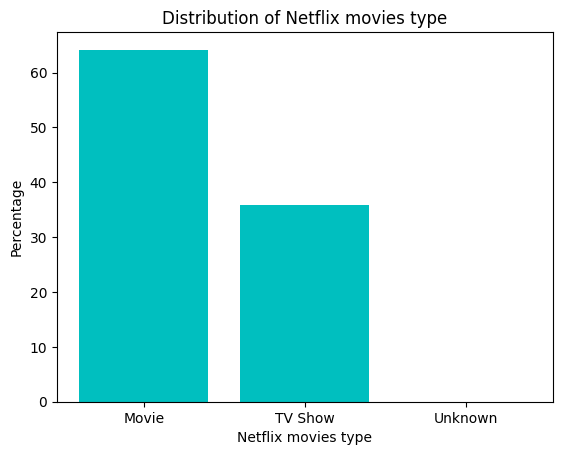

In [ ]:
plt.bar(ps.index,ps.values,color='c')

plt.xlabel('Netflix movies type')
plt.ylabel('Percentage')
plt.title('Distribution of Netflix movies type')
plt.show()

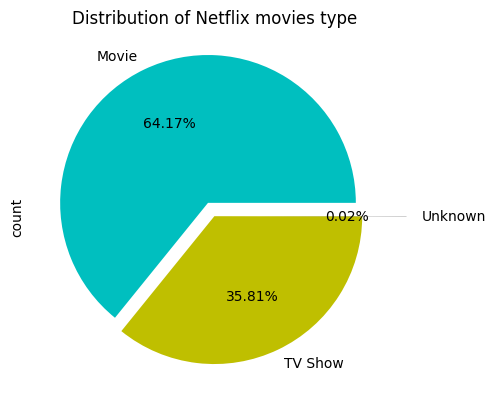

In [ ]:
# another way
ps.plot(kind='pie',colors=['c','y','k'],explode = [0.1,0,0.3] ,autopct='%1.2f%%')
plt.title('Distribution of Netflix movies type')
plt.show()

**Countries produce the most content on Netflix**

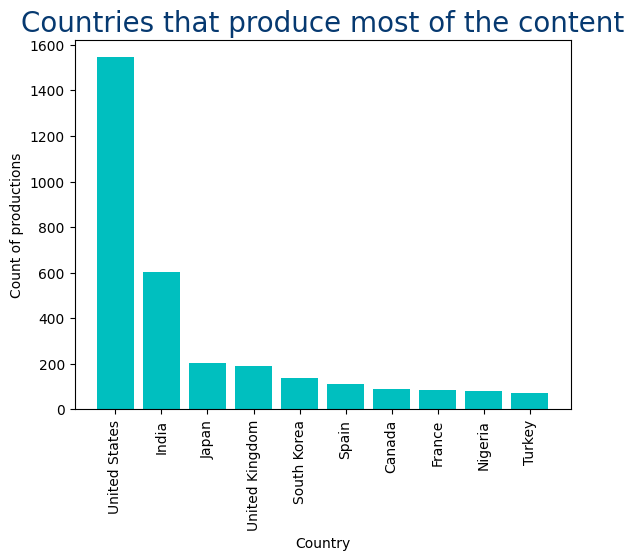

In [ ]:
#df["country"].value_counts().nlargest(10).plot(kind='bar', color='c')

countries = df["country"].value_counts().nlargest(10)
plt.bar(countries.index,countries.values, color='c')
plt.xticks(rotation=90)

plt.title('Countries that produce most of the content',fontsize=20,color='#063970')
plt.xlabel('Country')
plt.ylabel('Count of productions')
plt.show()

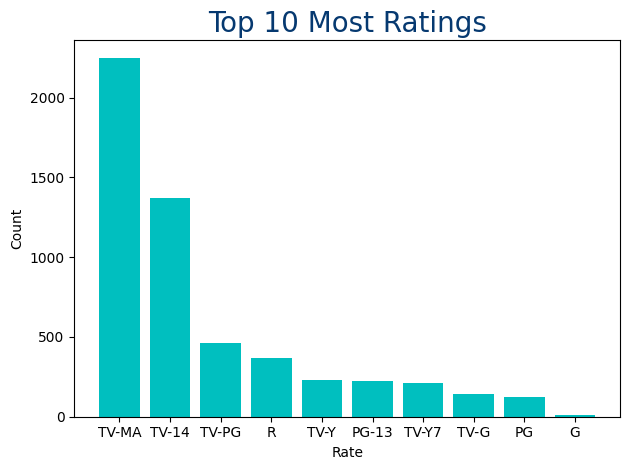

In [ ]:
# Another way for ploting Bars
counter = df["rating"].value_counts().nlargest(10)
plt.bar(counter.index, counter.values, color='c')

plt.title('Top 10 Most Ratings',fontsize=20,color='#063970')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

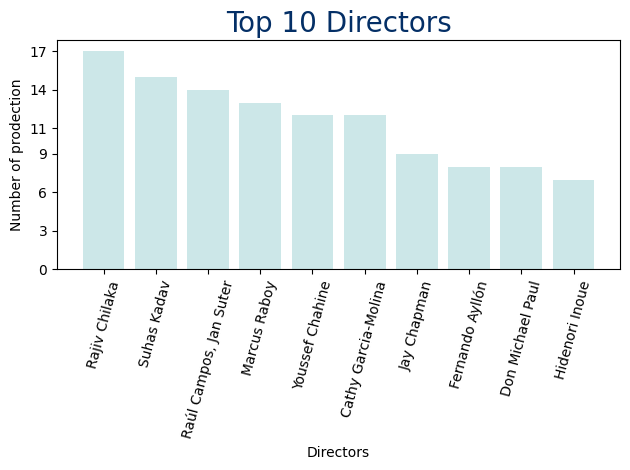

In [ ]:
counter = df["director"].value_counts().nlargest(10)

plt.bar(counter.index, counter.values, color='#cce7e8')


plt.title('Top 10 Directors',fontsize=20,color='#042f66')
plt.xlabel('Directors')
plt.ylabel('Number of prodection')
plt.xticks(rotation=75)
plt.yticks([0,3,6,9,11,14,17])
plt.tight_layout()
plt.show()

**This a visualization of durations for TV Show**

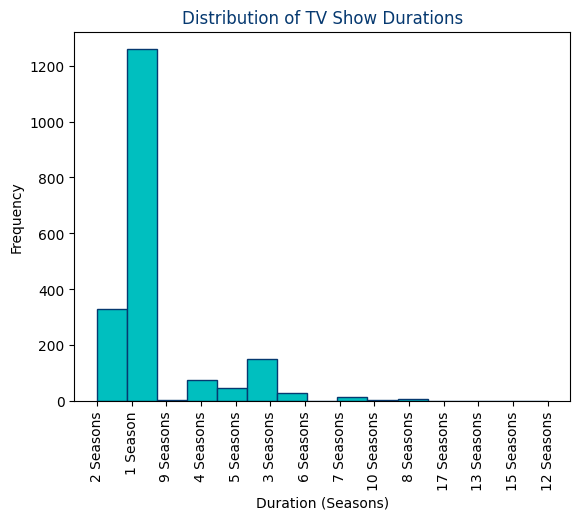

In [ ]:
TV_Show = df[df['type']=='TV Show']
duration = TV_Show['duration']
plt.hist(duration,bins=15,color='c', edgecolor='#063970')
plt.xticks(rotation=90)

plt.title('Distribution of TV Show Durations',color='#063970')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Frequency')
plt.show()

**Now let's add columns for first and second actor**

In [ ]:
df['actor1'] = df['cast'].str.split(',').str[0]
df['actor2'] = df['cast'].str.split(',').str[1]

df.sample(frac=.05)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season,actor1,actor2
4686,Movie,One Last Shot,Mike Clattenburg,"Robb Wells, John Paul Tremblay, John Dunsworth",Canada,2018-08-24,1998.0,TV-MA,31 min,Comedies,"In this low-budget short film, two best buddie...",2018,8,Summer,Robb Wells,John Paul Tremblay
1773,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019.0,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Fall,Adriano Zumbo,Rachel Khoo
3459,Movie,Ready to Mingle,Luis Javier Henaine,"Cassandra Ciangherotti, Gabriela de la Garza, ...",Mexico,2019-10-02,2019.0,TV-MA,98 min,"Comedies, International Movies, Romantic Movies",After the man she thought she'd marry breaks u...,2019,10,Fall,Cassandra Ciangherotti,Gabriela de la Garza
4927,Movie,Beyond Skyline,Liam O'Donnell,"Frank Grillo, Bojana Novakovic, Jonny Weston, ...","United States, Canada, Indonesia, United Kingd...",2018-04-15,2017.0,R,107 min,"Action & Adventure, Sci-Fi & Fantasy","In the wake of an extraterrestrial invasion, a...",2018,4,Spring,Frank Grillo,Bojana Novakovic
3456,Movie,Super Monsters: Vida's First Halloween,"Jacob Joice, Steve Ball","Gigi Saul Guerrero, Elyse Maloway, Vincent Ton...",United States,2019-10-04,2019.0,TV-Y,24 min,Children & Family Movies,The Super Monsters share their Halloween tradi...,2019,10,Fall,Gigi Saul Guerrero,Elyse Maloway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Movie,The Forest,Jason Zada,"Natalie Dormer, Taylor Kinney, Yukiyoshi Ozawa...",United States,2020-02-16,2016.0,PG-13,93 min,"Horror Movies, Independent Movies",A young woman conducts a search for her twin s...,2020,2,Winter,Natalie Dormer,Taylor Kinney
3380,Movie,The Awakening of Motti Wolkenbruch,Michael Steiner,"Inge Maux, Noémie Schmidt, Joel Basman, Sunnyi...",Switzerland,2019-10-25,2018.0,TV-MA,94 min,"Comedies, Dramas, International Movies",Pressured to marry a nice Orthodox Jewish woma...,2019,10,Fall,Inge Maux,Noémie Schmidt
3582,Movie,Selfless,Tarsem Singh,"Ryan Reynolds, Natalie Martinez, Matthew Goode...",United States,2019-08-16,2015.0,PG-13,117 min,"Sci-Fi & Fantasy, Thrillers",A dying tycoon has his consciousness transplan...,2019,8,Summer,Ryan Reynolds,Natalie Martinez
3215,Movie,The Accidental Spy,Roger Russell,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Nigeria,2019-11-29,2017.0,TV-MA,104 min,"Action & Adventure, Comedies, International Mo...","Nursing a broken heart, an IT specialist moves...",2019,11,Fall,Ramsey Nouah,Christine Allado


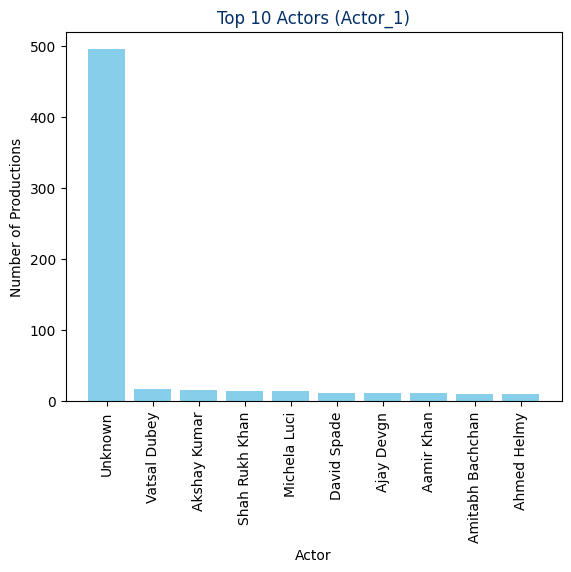

In [ ]:
top_10_actors1 = df['actor1'].value_counts().nlargest(10)

plt.bar(top_10_actors1.index, top_10_actors1.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 10 Actors (Actor_1)',color='#042f66')
plt.xlabel('Actor')
plt.ylabel('Number of Productions')
plt.show()

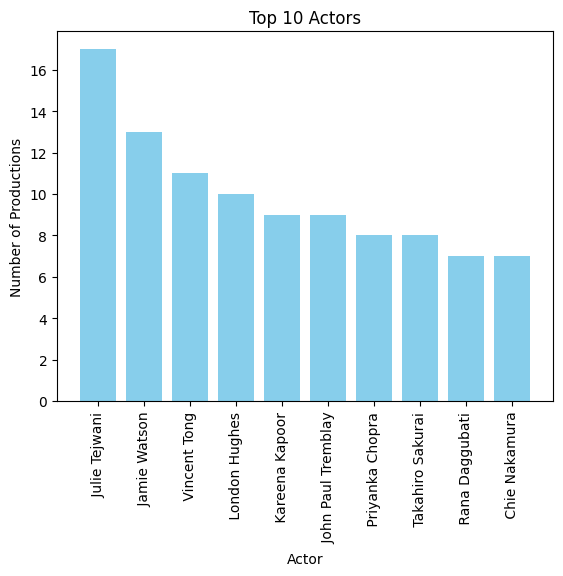

In [ ]:
top_10_actors2 = df['actor2'].value_counts().nlargest(10)

plt.bar(top_10_actors2.index, top_10_actors2.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Top 10 Actors (Actor_2)',color='#042f66')
plt.xlabel('Actor')
plt.ylabel('Number of Productions')
plt.show()